This notebook is an example of using pydsm to read DSM2 h5 output.
The timeseries are loaded as pandas data frame with datetime index and mcolumns of variable type (e.g. flow, stage, ec)
This script is to read DSM2 hdf5 output directly and load it into pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pydsm.io

In [2]:
filename='historical_v82.h5'
input_tables=pydsm.io.list_groups_as_df(filename, '/hydro/input')
for table in input_tables[0]:
    display(pydsm.io.read_table_as_df(filename, '/hydro/input/'+str(table)))

,name,node,sign,fillin,file,path
0,b'calaveras',21,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RCAL009/FLOW//1DAY/DWR-DMS-201707/'
1,b'cosumnes',446,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RCSM075/FLOW//1DAY/DWR-DMS-201707/'
2,b'moke',447,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RMKL070/FLOW//1DAY/DWR-DMS-201707/'
3,b'north_bay',273,-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/SLBAR002/FLOW-EXPORT//1DAY/DWR-DM...
4,b'sac',330,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RSAC155/FLOW//1DAY/DWR-DMS-201707/'
5,b'vernalis',17,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RSAN112/FLOW//1DAY/DWR-DMS-201707/'
6,b'yolo',316,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/BYOLO040/FLOW//1DAY/DWR-DMS-201707/'


,name,node,fillin,file,path
0,b'mtz',361,b'linear',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RSAC054/STAGE//15MIN/DWR-DMS-2017...


,chan_no,length,manning,dispersion,upnode,downnode
0,1,19500,0.035,360.0,1,2
1,2,14000,0.028,360.0,2,3
2,3,13000,0.028,360.0,3,4
3,4,14050,0.028,360.0,4,5
4,5,12350,0.028,360.0,5,6
5,6,9878,0.028,360.0,6,7
6,7,8796,0.028,360.0,7,8
7,8,11625,0.030,360.0,8,9
8,9,10497,0.030,360.0,9,10
9,10,9400,0.030,360.0,10,11


,chan_no,distance,stage,flow
0,1,b'0',10.0,2600.0
1,1,b'length',9.5,2400.0
2,2,b'0',9.5,2400.0
3,2,b'length',9.0,2200.0
4,3,b'0',8.5,2200.0
5,3,b'length',8.0,2000.0
6,4,b'0',8.0,2000.0
7,4,b'length',7.5,1800.0
8,5,b'0',7.5,1800.0
9,5,b'length',7.0,1600.0


,name,value
0,b'BNDRYINPUT',b'../../timeseries/hist0717.dss'
1,b'CLIMATE',b'../../timeseries/climate-5years.dss'
2,b'DICUFILE',b'../../timeseries/DCD_Sep2016.dss'
3,b'DICUFILE-ECS',b'../../timeseries/dicu_2017.dss'
4,b'DICUFILE_ECE',b'../../timeseries/dicuwq_3vals_extended.dss'
5,b'DICUFILE_ECS',b'../../timeseries/dicuwq_3vals_extended.dss'
6,b'DSM2AGENCY',b'dwr'
7,b'DSM2INPUTDIR',b'../../common_input'
8,b'DSM2MODIFIER',b'historical_v82'
9,b'DSM2OUTPUTDIR',b'./output'


,name,from_obj,from_identifier,to_node
0,b'7_mile@3_mile',b'channel',b'308',240
1,b'7_mile@sjr',b'channel',b'307',41
2,b'FalseBarrier',b'channel',b'279',44
3,b'clifton_court',b'reservoir',b'clifton_court',72
4,b'delta_cross_channel',b'channel',b'365',342
5,b'goodyear_sl',b'channel',b'473',367
6,b'grant_line_barrier',b'channel',b'206',172
7,b'middle_r_barrier',b'channel',b'134',112
8,b'montezuma_salinity_control',b'channel',b'512',418
9,b'morrow_c_line_outfall',b'channel',b'542',365


,gate_name,device,nduplicate,radius,elev,cf_from_node,cf_to_node,default_op
0,b'7_mile@3_mile',b'pipes',2,2.00,-4.595,0.5,0.5,b'gate_open'
1,b'7_mile@sjr',b'pipes',1,2.00,-4.628,0.0,0.0,b'gate_close'
2,b'goodyear_sl',b'pipes',4,2.00,-0.408,0.4,0.4,b'unidir_to_node'
3,b'grant_line_barrier',b'pipes',6,2.00,-4.187,0.6,0.6,b'unidir_from_node'
4,b'middle_r_barrier',b'pipes',6,2.00,-1.733,0.6,0.6,b'unidir_to_node'
5,b'morrow_c_line_outfall',b'pipes',2,1.50,0.059,0.5,0.5,b'unidir_to_node'
6,b'morrow_m_line_outfall',b'pipes',3,2.00,-2.321,0.5,0.5,b'unidir_to_node'
7,b'morrow_sys_intake',b'pipes',3,2.00,-2.598,0.2,0.2,b'unidir_from_node'
8,b'old_r@head_barrier',b'pipes',8,2.00,-5.674,0.6,0.6,b'gate_open'
9,b'old_r@tracy_barrier',b'pipes',9,2.00,-3.641,0.6,0.6,b'unidir_from_node'


,gate_name,device,nduplicate,width,elev,height,cf_from_node,cf_to_node,default_op
0,b'FalseBarrier',b'barrier',1,950.0,20.000,9999.0,0.65,0.65,b'gate_open'
1,b'clifton_court',b'reservoir_gates',5,20.0,-7.748,9999.0,1.00,1.00,b'unidir_from_node'
2,b'delta_cross_channel',b'cross_channel_gates',2,60.0,-11.218,9999.0,2.00,2.00,b'gate_open'
3,b'grant_line_barrier',b'barrier',1,180.0,3.313,9999.0,0.80,0.80,b'gate_open'
4,b'middle_r_barrier',b'barrier',1,140.0,3.267,9999.0,0.70,0.70,b'gate_open'
5,b'montezuma_salinity_control',b'boat_lock',1,20.0,-7.510,9999.0,0.80,0.80,b'gate_close'
6,b'montezuma_salinity_control',b'flashboards',1,66.0,-17.010,9999.0,1.00,1.00,b'gate_close'
7,b'montezuma_salinity_control',b'modified_flashboard',1,40.0,-8.510,1.0,0.60,0.60,b'gate_close'
8,b'montezuma_salinity_control',b'radial_gates',3,36.0,-22.510,9999.0,1.00,1.00,b'gate_open'
9,b'old_r@head_barrier',b'fall_barrier',1,32.0,2.326,9999.0,0.70,0.70,b'gate_open'


,gate_name,device,variable,fillin,file,path


,transfer_name,fillin,file,path


,model,type,io,interval,file
0,b'hydro',b'echo',b'out',b'none',b'./output/hydro_echo_historical_v82.inp'
1,b'hydro',b'hdf5',b'out',b'30min',b'./output/historical_v82.h5'
2,b'hydro',b'output',b'out',b'none',b'./output/historical_v82.hof'
3,b'hydro',b'restart',b'out',b'1mon',b'./output/historical_v82.hrf'


,number,name
0,0,b'historical_hydro.inp'
1,1,b'configuration_historical.inp'
2,2,b'../../common_input/channel_std_delta_grid_na...
3,3,b'../../common_input/reservoir_std_delta_grid_...
4,4,b'../../common_input/gate_std_delta_grid_20160...
5,5,b'../../common_input/channel_ic_std_delta_grid...
6,6,b'../../common_input/reservoir_ic_std_delta_gr...
7,7,b'../../common_input/boundary_flow_delta_histo...
8,8,b'../../common_input/source_flow_delta_histori...
9,9,b'../../common_input/boundary_stage_delta_hist...


,name,action,trigger
0,b'FalseBarrier_in',b'SET gate_install(gate=FalseBarrier) TO 1.0',b'DATETIME >= 28MAY2015 AND DATETIME <= 01OCT2...
1,b'FalseBarrier_out',b'SET gate_install(gate=FalseBarrier) TO 0.0',b'DATETIME < 28MAY2015 OR DATETIME > 01OCT2015'
2,b'clfct_gate_op',"b'SET gate_op(gate=clifton_court,device=reserv...",b'TRUE'
3,b'dcc_gate_op',"b'SET gate_op(gate=delta_cross_channel,device=...",b'TRUE'
4,b'glc_barrier_elev',"b'SET gate_elev(gate=grant_line_barrier, devic...",b'TRUE'
5,b'glc_barrier_width',"b'SET gate_width(gate=grant_line_barrier, devi...",b'TRUE'
6,b'glc_install_in',b'SET gate_install(gate=grant_line_barrier) TO...,b'ts(name=glc_install) >= 1.0'
7,b'glc_install_out',b'SET gate_install(gate=grant_line_barrier) TO...,b'ts(name=glc_install) <= 0.0'
8,b'glc_pipe_op_down',"b'SET gate_op(gate=grant_line_barrier,device=p...",b'TRUE'
9,b'mid_barrier_elev',"b'SET gate_elev(gate=middle_r_barrier, device=...",b'TRUE'


,name,definition
0,b'mscs_calc',b'ts(name=mscs_op) < 0'
1,b'mscs_dhopen',"b'(chan_stage(channel=512,dist=6038) - chan_st..."
2,b'mscs_velclose',"b'chan_vel(channel=513,dist=0) < -0.1'"


,name,fillin,file,path
0,b'clfct_op',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/CHWST000/POS//IR-YEAR/DWR-OM-JOC-...
1,b'dcc_op',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/RSAC128/POS//IR-YEAR/DWR-DMS-DSM2/'
2,b'glc_elev',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/GL_CN/WEIRELEVATION//IR-DECADE/DW...
3,b'glc_install',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/GL_CN/INSTALL//IR-DECADE/DWR-BDO/'
4,b'glc_pipeopdown',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/GL_CN/PIPE_OP_DOWN//IR-DECADE/DWR...
5,b'glc_width',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/GL_CN/WEIRWIDTH//IR-DECADE/DWR-BDO/'
6,b'mid_elev',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/MID_R/WEIRELEVATION//IR-DECADE/DW...
7,b'midr_install',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/MID_R/INSTALL//IR-DECADE/DWR-BDO/'
8,b'midr_pipeopdown',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/MID_R/PIPE_OP_DOWN//IR-DECADE/DWR...
9,b'mscs_fract',b'last',b'../../timeseries/gates-v8-201707.dss',b'/HIST+GATE/MTZSL/RADIAL_FRACT//IR-DECADE/DWR...


,name,chan_no,distance,variable,interval,period_op,file
0,b'CHAN134',134,b'3814',b'flow',b'15MIN',b'inst',b'./output/historical_v82.dss'
1,b'CHAN134',134,b'3814',b'stage',b'15MIN',b'inst',b'./output/historical_v82.dss'
2,b'CHAN212',212,b'0',b'flow',b'15MIN',b'inst',b'./output/historical_v82.dss'
3,b'CHAN212',212,b'0',b'stage',b'15MIN',b'inst',b'./output/historical_v82.dss'
4,b'CHAN392',392,b'0',b'flow',b'15MIN',b'inst',b'./output/historical_v82.dss'
5,b'CHAN392',392,b'0',b'stage',b'15MIN',b'inst',b'./output/historical_v82.dss'
6,b'CHAN59',59,b'2381',b'flow',b'15MIN',b'inst',b'./output/historical_v82.dss'
7,b'CHAN59',59,b'2381',b'stage',b'15MIN',b'inst',b'./output/historical_v82.dss'
8,b'CHAN70',70,b'1993',b'flow',b'15MIN',b'inst',b'./output/historical_v82.dss'
9,b'CHAN70',70,b'1993',b'stage',b'15MIN',b'inst',b'./output/historical_v82.dss'


,name,gate_name,device,variable,interval,period_op,file


,name,res_name,node,variable,interval,period_op,file
0,b'clifton_court',b'clifton_court',b'72',b'flow',b'15MIN',b'inst',b'./output/historical_v82.dss'
1,b'clifton_court',b'clifton_court',b'none',b'stage',b'15MIN',b'inst',b'./output/historical_v82.dss'


,name,area,bot_elev
0,b'bethel',15.5031,-5.741
1,b'clifton_court',91.8680,-7.748
2,b'discovery_bay',19.6320,-13.654
3,b'franks_tract',141.7864,-7.754
4,b'liberty',226.9040,-7.652
5,b'mildred',42.2996,-11.823


,res_name,node,coef_in,coef_out
0,b'bethel',220,1500.0,1500.0
1,b'discovery_bay',197,1125.0,0.0
2,b'discovery_bay',198,1125.0,1125.0
3,b'franks_tract',103,2250.0,2250.0
4,b'franks_tract',216,1500.0,1500.0
5,b'franks_tract',219,1500.0,1500.0
6,b'franks_tract',224,2250.0,2250.0
7,b'franks_tract',225,1500.0,1500.0
8,b'franks_tract',232,2250.0,2250.0
9,b'liberty',322,7500.0,5625.0


,res_name,stage
0,b'bethel',5.0
1,b'clifton_court',5.0
2,b'discovery_bay',5.0
3,b'franks_tract',5.0
4,b'liberty',7.0
5,b'mildred',5.0


,res_name,elev,area,volume


,name,value
0,b'binary_output',b'false'
1,b'checkdata',b'false'
2,b'cont_bad',b'false'
3,b'cont_missing',b'true'
4,b'cont_question',b'true'
5,b'cont_unchecked',b'true'
6,b'deltax',b'5000'
7,b'display_intvl',b'1day'
8,b'dss_direct',b'true'
9,b'flush_output',b'20day'


,name,node,sign,fillin,file,path
0,b'ccc',206,-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/CHCCC006/FLOW-DIVERSION//1DAY/DWR...
1,b'cccoldr',80,-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/ROLD034/FLOW-EXPORT//1DAY/DWR-DMS...
2,b'ccw',191,-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/CHVCT001/FLOW-EXPORT//1DAY/DWR-DM...
3,b'cvp',181,-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/CHDMC004/FLOW-EXPORT//1DAY/DWR-DM...
4,b'dicu_div_1',1,-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+NODE/1/DIV-FLOW//1DAY/DWR-BDO/'
5,b'dicu_div_10',10,-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+NODE/10/DIV-FLOW//1DAY/DWR-BDO/'
6,b'dicu_div_100',100,-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+NODE/100/DIV-FLOW//1DAY/DWR-BDO/'
7,b'dicu_div_104',104,-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+NODE/104/DIV-FLOW//1DAY/DWR-BDO/'
8,b'dicu_div_105',105,-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+NODE/105/DIV-FLOW//1DAY/DWR-BDO/'
9,b'dicu_div_106',106,-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+NODE/106/DIV-FLOW//1DAY/DWR-BDO/'


,name,res_name,sign,fillin,file,path
0,b'dicu_div_bbid',b'clifton_court',-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+RSVR/BBID/DIV-FLOW//1DAY/DWR-BDO/'
1,b'dicu_drain_bbid',b'clifton_court',1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+RSVR/BBID/DRAIN-FLOW//1DAY/DWR-BDO/'
2,b'dicu_seep_bbid',b'clifton_court',-1,b'last',b'../../timeseries/DCD_Sep2016.dss',b'/DICU-HIST+RSVR/BBID/SEEP-FLOW//1DAY/DWR-BDO/'
3,b'swp',b'clifton_court',-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/CHSWP003/FLOW-EXPORT//1DAY/DWR-DM...


,name,from_obj,from_identifier,to_obj,to_identifier


,chan_no,dist,file


,chan_no,dist,elev,area,width,wet_perim
0,1,0.240,4.225,0.0,0.0,0.0
1,1,0.240,5.995,103.6,116.4,116.5
2,1,0.240,27.715,10088.4,803.1,805.2
3,1,0.240,35.345,16724.9,936.8,939.9
4,1,0.240,38.475,19710.7,970.3,973.6
5,1,0.953,2.509,0.0,0.0,0.0
6,1,0.953,4.199,213.7,253.3,253.5
7,1,0.953,18.789,4592.7,346.7,351.5
8,1,0.953,24.449,7426.6,655.2,660.8
9,1,0.953,35.649,15192.5,731.5,740.3


In [3]:
filename='historical_v82.h5'
x=pydsm.io.read_table_as_df(filename,'/hydro/input/boundary_flow')
display(x)

,name,node,sign,fillin,file,path
0,b'calaveras',21,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RCAL009/FLOW//1DAY/DWR-DMS-201707/'
1,b'cosumnes',446,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RCSM075/FLOW//1DAY/DWR-DMS-201707/'
2,b'moke',447,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RMKL070/FLOW//1DAY/DWR-DMS-201707/'
3,b'north_bay',273,-1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/SLBAR002/FLOW-EXPORT//1DAY/DWR-DM...
4,b'sac',330,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RSAC155/FLOW//1DAY/DWR-DMS-201707/'
5,b'vernalis',17,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/RSAN112/FLOW//1DAY/DWR-DMS-201707/'
6,b'yolo',316,1,b'last',b'../../timeseries/hist0717.dss',b'/FILL+CHAN/BYOLO040/FLOW//1DAY/DWR-DMS-201707/'


In [4]:
cb=pydsm.io.hydro_channel_bottoms(filename)
display(cb)

,1,2,3,4,5,6,7,8,9,10,...,570,571,572,573,574,575,700,701,702,703
upstream,3.502402,2.509000,-1.508806,-4.334,-5.233000,-4.291078,-8.331375,-10.903000,-7.543957,-8.892461,...,-41.006001,-16.632999,-3.495559,-4.410000,-4.156,-4.596,-10.672000,-16.3335,-11.8615,-0.3100
downstream,2.509000,-1.508806,-1.844000,-5.247,-4.291078,-8.331375,-11.900000,-7.543957,-8.892461,-8.513715,...,-22.570000,-20.937000,-4.967000,-3.495559,-10.189,-7.519,-11.144672,-10.6720,-16.3335,-11.8615


In [5]:
import importlib
importlib.reload(pydsm.io)

<module 'pydsm.io' from 'D:\\delta\\dsm2_v820_beta\\studies\\historical\\output\\pydsm\\io.py'>

In [6]:
f5=h5py.File(filename,'r')
catable=f5['/hydro/data/channel area']

In [7]:
pydsm.io.read_table_attr(filename,'/hydro/data/channel area' )

,Name,Value
0,CLASS,[b'TIMESERIES']
1,DIMENSION_LABELS,"[b'channel_number', b'channel_number', b'time']"
2,DIMENSION_LIST,"[[<HDF5 object reference>, <HDF5 object refere..."
3,interval,[b'30min']
4,model,[b'Hydro']
5,model_version,[b'8.2']
6,start_time,[b'1990-01-02 00:00:00']
7,shape,"(468865, 521, 2)"


In [8]:
caa=pydsm.io.read_table_attr(filename,'/hydro/data/channel area')
table_metadata=pydsm.io.df_to_dict(caa)
display(table_metadata)
pd.to_timedelta(table_metadata['interval'].astype(str)[0])
pd.to_datetime(table_metadata['start_time'].astype(str)[0])


{'CLASS': array([b'TIMESERIES'], dtype='|S10'),
 'DIMENSION_LABELS': array([b'channel_number', b'channel_number', b'time'], dtype=object),
 'DIMENSION_LIST': array([array([<HDF5 object reference>, <HDF5 object reference>], dtype=object),
        array([], dtype=object), array([], dtype=object)], dtype=object),
 'interval': array([b'30min'], dtype='|S5'),
 'model': array([b'Hydro'], dtype='|S5'),
 'model_version': array([b'8.2'], dtype='|S3'),
 'start_time': array([b'1990-01-02 00:00:00'], dtype='|S19'),
 'shape': '(468865, 521, 2)'}

Timestamp('1990-01-02 00:00:00')

In [9]:
class TableMetaData:
    pass
tmd=TableMetaData()
tmd.table_name='/hydro/data/channel area'
tmd.interval=pd.to_timedelta('30min')
tmd.start_time=pd.to_datetime('1990-01-02 00:00:00')
tmd.dimension_labels=table_metadata['DIMENSION_LABELS'].astype('str')
from ast import literal_eval as make_tuple
tmd.shape=make_tuple(table_metadata['shape'])
print(tmd.shape)


(468865, 521, 2)


In [14]:
s=pydsm.io._convert_time_to_table_slice("01jan1980","01jan1991",tmd.interval,tmd.start_time,tmd.shape[0])
print(s)
x=catable[s,[501,502],0]
#pydsm.io.read_table_as_df(filename,"/hydro/data/channel area",s)

slice(0, 17472, 1)


In [18]:
bf=pd.DataFrame(data=np.array(x), index=pd.DatetimeIndex(data=pd.date_range(start=tmd.start_time+tmd.interval,freq=tmd.interval,periods=s.stop)))

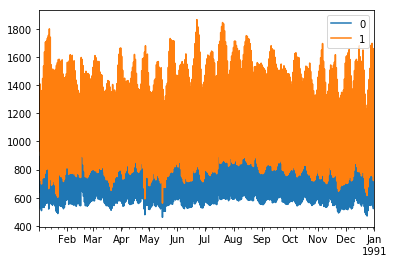

In [20]:
bf.plot()

In [83]:
import importlib
importlib.reload(pydsm.io)
#x=pydsm.io.read_table_as_df(filename,'/hydro/data/channel area',slice=(slice(1,5),slice(1,6),slice(0,1)))
#x=pydsm.io.read_table_as_df(filename,'/hydro/data/channel area',slice=(s,slice(None),slice(None)))
#print(x)
sl=(s,slice(None),slice(None))
type(caa)

pandas.core.frame.DataFrame

In [143]:
import importlib
importlib.reload(pydsm.io)

<module 'pydsm.io' from 'D:\\delta\\dsm2_v820_beta\\studies\\historical\\output\\pydsm\\io.py'>

In [18]:
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/external_flow_names'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/hydro_comp_point'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/node_flow_connections'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/qext'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/reservoir_flow_connections'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/reservoir_names'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/reservoir_node_connect'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/stage_boundaries'))
display(pydsm.io.read_table_as_df(filename,'/hydro/geometry/transfer_names'))


,0
0,b'calaveras'
1,b'cosumnes'
2,b'moke'
3,b'north_bay'
4,b'sac'
5,b'vernalis'
6,b'yolo'
7,b'ccc'
8,b'cccoldr'
9,b'ccw'


,comp_index,channel,distance
0,1,1,0.0
1,2,1,6500.0
2,3,1,13000.0
3,4,1,19500.0
4,5,2,0.0
5,6,2,7000.0
6,7,2,14000.0
7,8,3,0.0
8,9,3,6500.0
9,10,3,13000.0


,connection_index,int_node_no,ext_node_no,node_flow_index,flow_index,flow_name,flow_type
0,1,1,1,1,12,b'dicu_div_1 ',b'qext '
1,2,1,1,2,269,b'dicu_drain_1 ',b'qext '
2,3,1,1,3,526,b'dicu_seep_1 ',b'qext '
3,4,3,3,1,165,b'dicu_div_3 ',b'qext '
4,5,3,3,2,422,b'dicu_drain_3 ',b'qext '
5,6,3,3,3,679,b'dicu_seep_3 ',b'qext '
6,7,5,5,1,225,b'dicu_div_5 ',b'qext '
7,8,5,5,2,482,b'dicu_drain_5 ',b'qext '
8,9,5,5,3,739,b'dicu_seep_5 ',b'qext '
9,10,6,6,1,235,b'dicu_div_6 ',b'qext '


,name,attach_obj_name,attached_obj_type,attached_obj_no
0,b'calaveras ',b' 21 ',2,20
1,b'cosumnes ',b' 446 ',2,428
2,b'moke ',b' 447 ',2,429
3,b'north_bay ',b' 273 ',2,402
4,b'sac ',b' 330 ',2,295
5,b'vernalis ',b' 17 ',2,393
6,b'yolo ',b' 316 ',2,285
7,b'ccc ',b' 206 ',2,400
8,b'cccoldr ',b' 80 ',2,79
9,b'ccw ',b' 191 ',2,178


,connection_index,res_name,res_index,res_flow_index,flow_index,flow_name,flow_type
0,1,b'clifton_court ',2,1,787,b'dicu_div_bbid ',b'qext '
1,2,b'clifton_court ',2,2,788,b'dicu_drain_bbid ',b'qext '
2,3,b'clifton_court ',2,3,789,b'dicu_seep_bbid ',b'qext '
3,4,b'clifton_court ',2,4,790,b'swp ',b'qext '


,0
0,b'bethel'
1,b'clifton_court'
2,b'discovery_bay'
3,b'franks_tract'
4,b'liberty'
5,b'mildred'


,res_node_index,res_name,res_index,connect_index,node_no,ext_node_no,connection_type
0,1,b'bethel ',1,1,203,220,b'node '
1,2,b'clifton_court ',2,1,71,72,b'gate '
2,3,b'discovery_bay ',3,1,183,197,b'node '
3,4,b'discovery_bay ',3,2,184,198,b'node '
4,5,b'franks_tract ',4,1,98,103,b'node '
5,6,b'franks_tract ',4,2,199,216,b'node '
6,7,b'franks_tract ',4,3,202,219,b'node '
7,8,b'franks_tract ',4,4,207,224,b'node '
8,9,b'franks_tract ',4,5,208,225,b'node '
9,10,b'franks_tract ',4,6,212,232,b'node '


,name,int_node_no,ext_node_no
0,b'mtz ',412,361


,0
0,b''


In [86]:
f1=h5py.File(filename,'r')
bf=f1['/hydro/data/channel area']
#bf.attrs
#a=pd.DataFrame(bf.attrs.items(),columns=['Name','Value'],dtype=str)

In [126]:
s=slice(1,5),slice(10,150),slice(1)
#s=slice(None)
bf.shape
st,et=pd.to_datetime("01jan1990"),pd.to_datetime("11march1992")
print(st,et)
#int((et-st)/pd.Timedelta('30min'))
#pd.date_range(start="01jan1990",end="05march1992")

1990-01-01 00:00:00 1992-03-11 00:00:00


In [185]:
#sl=(s,slice(None),slice(None))
#print(sl)
#pydsm.io.read_table_as_df(filename,'')
print(bf.shape)
#slice(0,10,1),slice([501,502]),slice(0))
#print(bf[1:5,slice([501,502]),slice([0])])
x=slice(1,10),[501,502],[0,1]
print(type(x))
print(x)
bf[x]
#pd.DataFrame(np.array(bf[sl]))

(468865, 521, 2)
<class 'tuple'>
(slice(1, 10, None), [501, 502], [0, 1])


TypeError: Only one indexing vector or array is currently allowed for advanced selection

In [182]:
time_slice=pydsm.io._convert_time_to_table_slice("01jan1990","11march1992","30min",pd.to_datetime("01jan1980"),500000)
cl=pydsm.io.read_table_as_df(filename, "/hydro/geometry/channel_location")
cl=cl.apply(lambda s: s.apply(lambda x: x.decode("utf-8")))
cn=pydsm.io.read_table_as_df(filename, "/hydro/geometry/channel_number")
channels_slice=pydsm.io.df_column_values_to_index(cn,0,[700,701])
location_slice=pydsm.io.df_column_values_to_index(cl,0,['upstream'])
x=time_slice,channels_slice,location_slice
display(x)
bf[x]

(slice(175344, 213744, 1),
 array([517, 518], dtype=int64),
 array([0], dtype=int64))

TypeError: Only one indexing vector or array is currently allowed for advanced selection

In [166]:
#cl=cl[0].apply(lambda x: x.decode("utf-8"))
#cl[0][0].decode("utf-8")
#
cl

0      upstream
1    downstream
Name: 0, dtype: object

In [93]:
cl=pydsm.io.read_table_as_df(filename, "/hydro/geometry/channel_location")
display(cl[0].values.astype(str))
cn=pydsm.io.read_table_as_df(filename, "/hydro/geometry/channel_number")
display(cn[0].values)
ca=pydsm.io.read_dsm2_table(filename,'/hydro/data/channel area', 
                         [cl[0].values.astype(str), cn[0].values],['channel location','channel number'])
display(ca)

array(['upstream', 'downstream'], dtype='<U12')

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  88,  89,  90,  91,  92,  94,
        95,  96,  97, 101, 102, 104, 105, 106, 107, 108, 111, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 19

channel location        upstream                                         \
channel number               1            1            2            2     
Time                                                                      
1990-01-02 00:00:00   874.874878  1646.726807  1646.726807  1931.057373   
1990-01-02 00:30:00   916.658386  1480.038818  1480.038818  1839.541138   
1990-01-02 01:00:00  1024.313110  1459.814697  1459.814697  1748.817505   
1990-01-02 01:30:00  1048.613770  1433.298462  1433.298462  1695.629517   
1990-01-02 02:00:00  1059.283813  1401.953979  1401.953979  1655.338989   
1990-01-02 02:30:00  1064.204468  1374.733765  1374.733765  1620.013428   
1990-01-02 03:00:00  1066.495972  1351.732910  1351.732910  1588.766968   
1990-01-02 03:30:00  1067.430176  1331.447510  1331.447510  1561.384644   
1990-01-02 04:00:00  1067.551636  1313.324097  1313.324097  1537.063354   
1990-01-02 04:30:00  1067.100464  1296.904419  1296.904419  1515.269287   
1990-01-02 05:00:00  1066.268677  1281.948730  1281.948730  1495.516113   
1990-01-02 05:30:00  1065.193726  1268.252808  1268.252808  1477.539673   
1990-01-02 06:00:00  1063.972778  1255.683350  1255.683350  1461.079224   
1990-01-02 06:30:00  1062.674805  1244.105957  1244.105957  1445.800659   
1990-01-02 07:00:00  1061.349365  1233.360352  1233.360352  1431.489014   
1990-01-02 07:30:00  1060.031738  1223.328735  1223.328735  1418.026733   
1990-01-02 08:00:00  1058.744629  1213.930786  1213.930786  1405.351807   
1990-01-02 08:30:00  1057.502563  1205.114746  1205.114746  1393.440186   
1990-01-02 09:00:00  1056.314453  1196.849487  1196.849487  1382.248169   
1990-01-02 09:30:00  1055.184814  1189.085938  1189.085938  1373.035278   
1990-01-02 10:00:00  1054.119385  1182.303955  1182.303955  1366.778687   
1990-01-02 10:30:00  1053.109131  1176.909546  1176.909546  1362.418335   
1990-01-02 11:00:00  1052.157593  1172.654785  1172.654785  1359.728516   
1990-01-02 11:30:00  1051.281250  1169.458740  1169.458740  1358.750122   
1990-01-02 12:00:00  1050.487183  1167.329590  1167.329590  1359.416748   
1990-01-02 12:30:00  1049.775879  1166.246704  1166.246704  1360.413940   
1990-01-02 13:00:00  1049.146729  1165.689819  1165.689819  1360.066406   
1990-01-02 13:30:00  1048.607910  1164.915771  1164.915771  1358.576294   
1990-01-02 14:00:00  1048.164551  1163.824097  1163.824097  1356.058472   
1990-01-02 14:30:00  1047.792480  1162.324341  1162.324341  1352.450195   
...                          ...          ...          ...          ...   
2016-09-29 09:30:00   472.633179   564.722473   564.722473   971.401978   
2016-09-29 10:00:00   472.393188   559.284912   559.284912   962.363220   
2016-09-29 10:30:00   472.205750   552.810181   552.810181   952.238708   
2016-09-29 11:00:00   472.046021   545.386475   545.386475   941.769714   
2016-09-29 11:30:00   471.914276   537.502258   537.502258   931.433411   
2016-09-29 12:00:00   471.807281   529.482849   529.482849   921.232727   
2016-09-29 12:30:00   471.711945   521.429688   521.429688   911.217346   
2016-09-29 13:00:00   471.625214   513.444336   513.444336   901.402771   
2016-09-29 13:30:00   471.544250   505.583771   505.583771   891.819458   
2016-09-29 14:00:00   471.467133   497.898865   497.898865   882.538025   
2016-09-29 14:30:00   471.393311   490.447296   490.447296   873.681885   
2016-09-29 15:00:00   471.324188   483.278778   483.278778   866.093262   
2016-09-29 15:30:00   471.249115   476.526001   476.526001   865.775574   
2016-09-29 16:00:00   471.125610   473.625427   473.625427   871.343323   
2016-09-29 16:30:00   471.191681   474.624237   474.624237   875.553894   
2016-09-29 17:00:00   471.117737   475.767731   475.767731   880.768982   
2016-09-29 17:30:00   471.033447   478.100525   478.100525   891.513916   
2016-09-29 18:00:00   470.944427   484.391052   484.391052   909.290039   
2016-09-29 18:30:00   470.944153   496.203796   496.203796   931.413025   
2016-09-29 19:00:00   470

In [125]:
cn.loc[cn[0].isin([700,701])].index.values
cn[cn[0].isin([700,701])].index.values
#cn[0]
channels_slice=pydsm.io.df_column_values_to_index(cn,0,[700,701])
#np.where(cn.values,[700])

In [30]:
sl=(time_slice,channels_slice,)
pydsm.io.read_table_as_df(filename, "/hydro/data/channel area", slice)

(468865, 1042)

## Step 1
Reading in the hdf5 file and table output/channel avg concentration into a pandas frame. 
This is a multi-dimensional table so hierarchical indices are needed to accomodate it. 
The attributes for the table contain the start time and time interval and those are used for indexing the first dimension as a datetime

In [3]:
filename='historical_v82_ec.h5'
na1=read_table_as_array(filename,'output/constituent_names')
na2=read_table_as_array(filename, 'output/channel_number',dtype=int)
#print(na1,na2)
df=read_dsm2_table(filename,'output/channel avg concentration',[na1,na2],['constituent','channel'])
#display(df)

In [4]:
import json
with open('dsm2-flowpolygons.geojson') as f: dsm2_grid=json.load(f)
for g in dsm2_grid['features']: g['id']=int(g['properties']['channel_nu'])

In [5]:
#

In [6]:
import ipyleaflet
from IPython.display import display
import ipywidgets as widgets
from branca.colormap import linear

## Map 
<font color=red>Warning: Geojson with polygons for channels is needed!</font>

In [7]:
max_time_steps=len(df.index)
constituent_names=na1
#
def extract_constituent_as_dict(df, timestep=0,constituent_name='ec'):
    tblx=df.iloc[timestep][constituent_name,slice(None)]
    return tblx.to_dict()
tbl0=extract_constituent_as_dict(df,100,'ec')
#
import matplotlib
import matplotlib.ticker
def make_nice_rounded_range(min,max,steps=10):
    l = matplotlib.ticker.AutoLocator()
    l.create_dummy_axis()
    x=l.tick_values(min,max)
    return x[0],x[-1]
#
layer = ipyleaflet.Choropleth(
    geo_data=dsm2_grid,
    choro_data=tbl0,
    value_min=100,
    value_max=25000,
    colormap=linear.Spectral_11, #linear.YlOrRd_04,
    style={'fillOpacity': 1.0})
#
def update_legend():
    # add legend
    v=layer.choro_data.values()
    r=make_nice_rounded_range(min(v),max(v))
    legend=linear.RdBu_11.scale(r[0],r[1])
    layer.colormap=legend
    out.clear_output()
    with out:
        display(legend)

def handle_slider_change(change):
    print(change.new)
    layer.choro_data=extract_constituent_as_dict(df,change.new, constituent_selector.value)
    
def handle_dropdown_change(change):
    layer.choro_data=extract_constituent_as_dict(df,slider.value, constituent_selector.value)
    update_legend()

#
m = ipyleaflet.Map(center = (38,-121), zoom = 11)
m.add_layer(layer)
m.add_control(ipyleaflet.FullScreenControl())
#add slider control
slider = widgets.IntSlider(min=0, max=max_time_steps, continuous_update=False)
slider.value = 0
slider.observe(handle_slider_change, names='value')
play = widgets.Play(
    value=0,
    interval=5000,
    min=0,
    max=max_time_steps,
    step=1,
    description="Press play",
    disabled=False
)
widgets.jslink((play, 'value'), (slider, 'value'))
constituents=constituent_names
constituent_selector=widgets.Dropdown(
    options=constituents,
    value='ec',
    description='Constituent:',
    disabled=False,
)
constituent_selector.observe(handle_dropdown_change, names='value')
#
#
control_widget=widgets.HBox([play, slider])
control_widget=widgets.VBox([constituent_selector,control_widget])
widget_control = ipyleaflet.WidgetControl(widget=control_widget, position='bottomright')
m.add_control(widget_control)
out = widgets.Output(layout={'border': '1px solid black'})
update_legend()
widget_control2 = ipyleaflet.WidgetControl(widget=out, position='topright')
m.add_control(widget_control2)
display(m)
#
#
#%matplotlib notebook
widget_output = widgets.Output(layout={'border': '1px solid black'})
def handle_click(**kwargs):
    if not 'id' in kwargs: return
    widget_output.clear_output(wait=True)
    cell_id=kwargs['id']
    with widget_output:
        p=kwargs['properties']
        for k in p:
            if k == 'id' or k == 'style': continue
            display(str(k)+' : '+str(p[k]))
        fig1, axes1 = plt.subplots()
        axes1.set_title(str(constituent_selector.value) + ' for ' + str(cell_id))
        axes1.set_ylabel(str(constituent_selector.value))
        #line1=axes1.axvline(x=slider.value,color='grey')
        #slider.observe(handle_line_)
        godin_filter(df.loc[:,(constituent_selector.value, cell_id)],'1hour').plot(kind='line',ax = axes1)
        plt.show(fig1)
layer.on_click(handle_click)
display(widget_output)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

Output(layout=Layout(border='1px solid black'))

In [8]:
for i in range(100): extract_constituent_as_dict(df,i, 'ec')

In [9]:
mtz_to_chipps=[441,440,452,438,443,437]
#ecdf['ec'][mtz_to_chipps]
mtzec=df['ec'][441]

In [10]:
mtzecg=godin_filter(mtzec)

In [11]:
%matplotlib notebook
axes1=mtzec.plot()
mtzecg.plot(ax=axes1)

<IPython.core.display.Javascript object>

In [12]:
mtzec_daily=mtzec.resample('D').mean()
mtzecg_daily=mtzecg.resample('D').mean()
display(len(mtzecg_daily),len(mtzec_daily))

9767

9767